In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

数据读取&归一化

In [8]:
X = np.load('feature_vector_v1.npy')

# X = MinMaxScaler().fit_transform(X)
X = StandardScaler().fit_transform(X)

用PCA对22维特征进行降维

In [9]:
# pca = KernelPCA(n_components=8, kernel='rbf', gamma=0.1)
pca = PCA(n_components=8)
X = pca.fit_transform(X)

用OneClassSVM进行OutlierDetection

In [10]:
ocsvm = OneClassSVM(nu=0.01, kernel='rbf', gamma=0.1)
# ocsvm = OneClassSVM(nu=0.1, kernel='sigmoid')
# ocsvm = OneClassSVM(kernel='linear')
ocsvm.fit(X)
Y = ocsvm.predict(X)
outliers = Y[Y==-1]
print(len(outliers))

109


In [11]:
tsne = TSNE(n_components=2)
X = tsne.fit_transform(X)
# plt.scatter(X[:, 0], X[:, 1])
# plt.show()

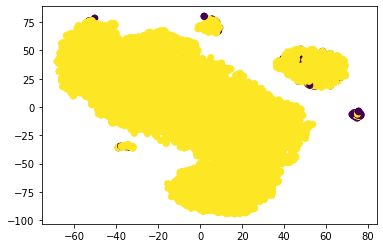

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

> OneClassSVM并不适宜用低维数据做异常点检测，因为使用低维数据OneClassSVM会强行拟合离群点，导致大量的inlier被识别为outlier。因此先用PCA降维到一个适中的维度，然后直接使用OneClassSVM进行离群点检测。最后t-SNE用来可视化